In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind

The data was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) and then cleaned for analysis. The principal investigators responsible for data collection were:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [158]:
heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


In [159]:
heart.groupby('heart_disease').mean()

/var/folders/_4/0sx4lk8s4193s8wnbm_p10gw0000gn/T/ipykernel_7803/3337008886.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  heart.groupby('heart_disease').mean()


,age,trestbps,chol,exang,fbs,thalach
heart_disease,,,,,,
absence,52.585366,129.250000,242.640244,0.140244,0.140244,158.378049
presence,56.625899,134.568345,251.474820,0.546763,0.158273,139.258993


In [160]:
heart.groupby('heart_disease').median()

/var/folders/_4/0sx4lk8s4193s8wnbm_p10gw0000gn/T/ipykernel_7803/2272015993.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  heart.groupby('heart_disease').median()


,age,trestbps,chol,exang,fbs,thalach
heart_disease,,,,,,
absence,52.0,130.0,234.5,0.0,0.0,161.0
presence,58.0,130.0,249.0,1.0,0.0,142.0


<Axes: xlabel='heart_disease', ylabel='thalach'>

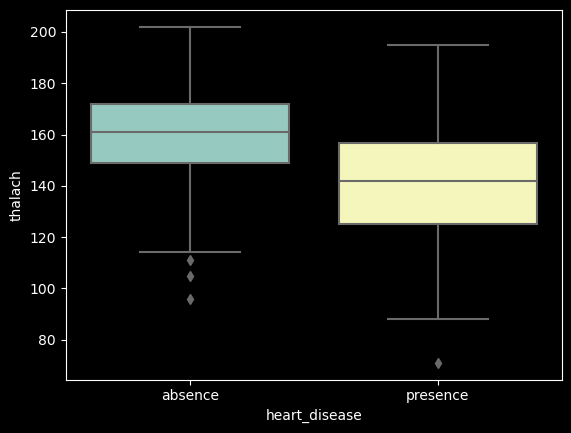

In [161]:
sns.boxplot(data=heart, x = 'heart_disease', y = 'thalach')

<Axes: xlabel='heart_disease', ylabel='trestbps'>

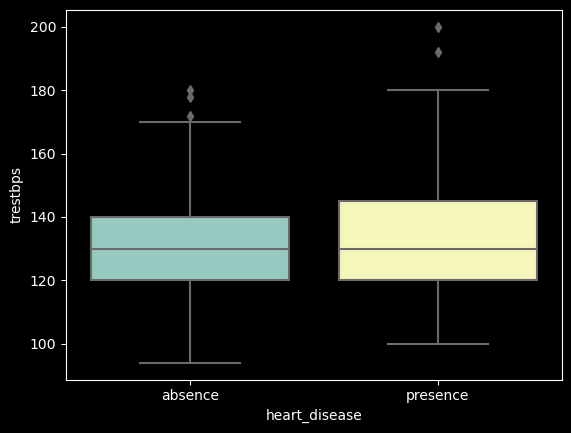

In [162]:
sns.boxplot(data=heart, x = 'heart_disease', y = 'trestbps')

## Simulated Test of Means

Scrambling the heart_disease column to see if we can make the mean difference between patients with heart disease and without heart disease = 0

**We are basically walking through a manual 2 sided T test**

In [163]:
heart[['trestbps', 'heart_disease']].head()

,trestbps,heart_disease
0,145.0,absence
1,160.0,presence
2,120.0,presence
3,130.0,absence
4,130.0,absence


In [164]:
scramble = np.random.choice(heart.heart_disease, len(heart), replace = False)
print(scramble)

['presence' 'presence' 'presence' 'presence' 'presence' 'absence'
 'presence' 'presence' 'absence' 'presence' 'presence' 'presence'
 'presence' 'presence' 'absence' 'absence' 'presence' 'absence' 'absence'
 'presence' 'absence' 'presence' 'absence' 'absence' 'absence' 'absence'
 'absence' 'presence' 'presence' 'absence' 'absence' 'absence' 'presence'
 'presence' 'absence' 'absence' 'absence' 'absence' 'absence' 'presence'
 'presence' 'absence' 'presence' 'absence' 'absence' 'presence' 'absence'
 'presence' 'presence' 'absence' 'presence' 'absence' 'absence' 'absence'
 'absence' 'absence' 'absence' 'presence' 'absence' 'absence' 'presence'
 'presence' 'absence' 'absence' 'absence' 'presence' 'presence' 'absence'
 'presence' 'absence' 'absence' 'absence' 'presence' 'absence' 'presence'
 'absence' 'presence' 'absence' 'absence' 'presence' 'presence' 'absence'
 'absence' 'absence' 'absence' 'absence' 'presence' 'absence' 'presence'
 'presence' 'presence' 'presence' 'absence' 'absence' 'pre

In [165]:
sim_trestbpm_hd = heart.trestbps[scramble == 'presence']
sim_trestbpm_no_hd = heart.trestbps[scramble == 'absence']

sim_mean_diff = np.mean(sim_trestbpm_hd) - np.mean(sim_trestbpm_no_hd)
print(sim_mean_diff)


-1.3674328829619071


In [166]:
null_mean_diff = []

for i in range(1000):
    scramble = np.random.choice(heart.heart_disease, len(heart), replace = False)
    sim_trestbpm_hd = heart.trestbps[scramble == 'presence']
    sim_trestbpm_no_hd = heart.trestbps[scramble == 'absence']
    sim_mean_diff = np.mean(sim_trestbpm_hd) - np.mean(sim_trestbpm_no_hd)
    null_mean_diff.append(sim_mean_diff)

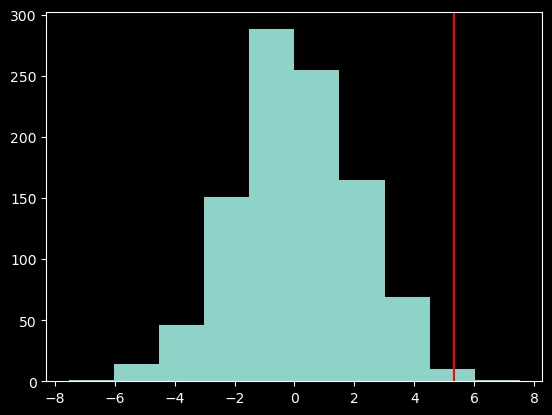

In [167]:
# plot the true observed_mean_diff over the below plot

observed_mean_diff = np.mean(heart.trestbps[heart.heart_disease == 'presence']) - np.mean(heart.trestbps[heart.heart_disease == 'absence'])

plt.hist(null_mean_diff)
plt.axvline(x = observed_mean_diff, color = 'red')

In [168]:
np.sum(np.array(null_mean_diff)>observed_mean_diff)/len(null_mean_diff) * 2

# * 2 because we are need to look at both sides of the distribution to get a two sided test. 
# The * 2 is an approximation

# The output is essentially our p-value in a two sample t test

0.008

# Two Sample T Test
Null: There is no difference in mean resting blood pressure among patients who do and do not have heart disease.  
Alternative: There is a difference in mean resting blood pressure among patients who do and do not have heart disease.

In [169]:
trestbps_hd = heart.trestbps[heart['heart_disease'] == 'presence']
trestbps_no_hd = heart.trestbps[heart['heart_disease'] == 'absence']
tstat, pval = ttest_ind(trestbps_hd, trestbps_no_hd)

print(pval)

0.008548268928594928
